<a href="https://colab.research.google.com/github/mahi97/MahiColabs/blob/master/LogisticReg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import tensorflow.keras.datasets.mnist as mnist

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train / 255
X_test = X_test / 255
y_test = [[0 == b,
                   1 == b,
                   2 == b,
                   3 == b,
                   4 == b,
                   5 == b,
                   6 == b,
                   7 == b,
                   8 == b,
                   9 == b] for b in y_test]
y_train = [[0 == b,
                   1 == b,
                   2 == b,
                   3 == b,
                   4 == b,
                   5 == b,
                   6 == b,
                   7 == b,
                   8 == b,
                   9 == b] for b in y_train]

In [48]:
print(X_train.shape, y_train[:10])
print(np.min(X_train), np.max(X_train))

(60000, 28, 28) [[False, False, False, False, False, True, False, False, False, False], [True, False, False, False, False, False, False, False, False, False], [False, False, False, False, True, False, False, False, False, False], [False, True, False, False, False, False, False, False, False, False], [False, False, False, False, False, False, False, False, False, True], [False, False, True, False, False, False, False, False, False, False], [False, True, False, False, False, False, False, False, False, False], [False, False, False, True, False, False, False, False, False, False], [False, True, False, False, False, False, False, False, False, False], [False, False, False, False, True, False, False, False, False, False]]
0.0 1.0


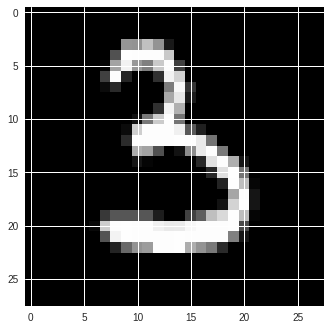

In [49]:
plt.imshow(X_train[np.random.randint(0, X_train.shape[0])], cmap='gray')

In [0]:
n_input = 28 * 28
n_output = 10
net_input = tf.placeholder(tf.float32, (None, n_input))

In [0]:
W = tf.Variable(tf.random_normal([n_input, n_output]))
b = tf.Variable(tf.random_normal([n_output]))
net_output = tf.nn.softmax(tf.matmul(net_input, W) + b)

In [0]:
y_true = tf.placeholder(tf.float32, [None, 10])

In [0]:
cross_entropy = -(tf.reduce_sum(y_true * tf.log(net_output)))

In [0]:
correct_prediction = tf.equal(tf.argmax(net_output, 1),
                              tf.argmax(y_true, 1))

In [0]:
accuracy = tf.reduce_mean(tf.cast(correct_prediction, 'float'))

In [0]:
optimizer = tf.train.GradientDescentOptimizer(0.01).minimize(cross_entropy)

In [0]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [111]:
batch_size = 100
n_epochs = 10
for epochs_i in range(n_epochs):
    print(epochs_i)
    for batch_i in range(X_train.shape[0] // batch_size):
      batch_xs = X_train[batch_i * batch_size: (batch_i + 1) * batch_size].reshape(batch_size,784)
      batch_ys = y_train[batch_i * batch_size: (batch_i + 1) * batch_size]
      sess.run(optimizer, feed_dict={
          net_input: batch_xs,
          y_true: batch_ys
      })
      



0
1
2
3
4
5
6
7
8
9


In [112]:
    print(sess.run(accuracy,
                  feed_dict={
                      net_input: X_test.reshape(10000,784),
                      y_true: y_test
                  }))

0.9024


In [0]:
tester = tf.argmax(net_output, 1)

[4]


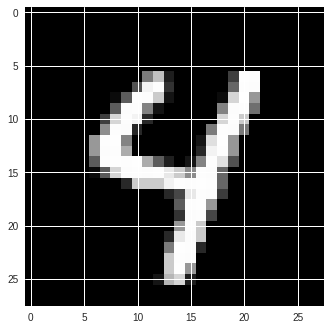

In [129]:
  rr = np.random.randint(0, X_test.shape[0])  
  print(sess.run(tester,
                  feed_dict={
                      net_input: X_test[rr].reshape(1,784)
                  }))
  
  plt.imshow(X_test[rr], cmap='gray')